# Exercices du chapitre 2

Notez que les exercices 4 et 6 ont été faits en TD.

In [1]:
using CSV, DataFrames, Gadfly, GLM, Distributions, LinearAlgebra, Cairo, Combinatorics   

In [2]:
function henryplot(y::Vector{<:Real})

    n = length(y)
    ysorted = sort(y)

    p = ( collect(1:n) .- .5 ) /n

    fd = fit(Normal,y)

    q = quantile.(fd,p)

    plot(x=ysorted, y=q, Geom.point,
    Guide.xlabel("Empirical quantiles"), Guide.ylabel("Estimated quantiles"),
    Theme(discrete_highlight_color=c->nothing),
    Geom.abline(color="red"))


end

henryplot (generic function with 1 method)

# Exercice 3

In [3]:
# Chargement des données

filename = joinpath(dirname(@__FILE__), "Data", "tuition_vs_salary.csv")

data = CSV.read(filename, DataFrame)

,University,Tuition,Salary
,String,Int64,Int64
1,Harvey Mudd College,50649,157400
2,Massachusetts Institute of Technology,46704,150400
3,Stanford University,46320,143100
4,California Institute of Technology,45390,143100
5,Harvard University,45278,142600
6,Princeton University,43450,141300
7,Yale University,47600,135400
8,University of California-Berkeley,13431,132300
9,Pennsylvania State University-Main Campus,17514,103100


In [4]:
data[!,:Tuition] = data[:,:Tuition]/1000
data[!,:Salary] = data[:,:Salary]/1000

12-element Vector{Float64}:
 157.4
 150.4
 143.1
 143.1
 142.6
 141.3
 135.4
 132.3
 103.1
  95.1
 133.6
 102.1

## 3 a) Illustration du salaire médian en mi-carrière en fonction des frais de scolarité

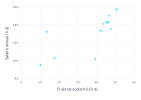

In [5]:
p = plot(data, x=:Tuition, y=:Salary, Geom.point,
    Guide.xlabel("Frais de scolarité (k \$)"), 
    Guide.ylabel("Salaire annuel (k \$)"))

# Une relation linéaire semble raisonnable bien qu'il y ait des points "extremes"

In [6]:
# draw(PDF("fig_ex3.pdf.pdf"), p)

## 3 b) Estimation des paramètres de la droite de régression

In [7]:
X₁ = convert(Array{Float64},data[:,:Tuition])
Y = convert(Array{Float64},data[:,:Salary])
n = length(Y)
X = hcat(ones(n),X₁)
p = size(X,2)-1

# estimation des paramètres avec la forme matricielle
β̂ = (X'*X)\X'*Y

println("β̂ = $β̂")

β̂ = [93.60046071444576, 1.018705452421104]


## 3 c) Calcul des résidus

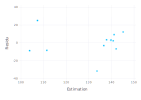

In [8]:
# calcul des estimations
Ŷ = X*β̂

# calcul des résidus
e = Y-Ŷ

# stockage dans un dataframe pour un affichage facile
df = DataFrame(Estimation = Ŷ, Residu = e)

plot(df,x=:Estimation,y=:Residu, Geom.point)

#= Les hypothèses 2 et 3 semblent raisonnables. Les résidus sont bien centrés autour de 0 et la variance 
sembe relativement constante =#

## 3 d) Validation de l'hypothèse de normalité des résidus

à ne pas faire pour l'instant

## 3 e) Test de l'importance de la régression

In [9]:
SST = sum( (Y .- mean(Y) ).^2)
SSE = sum( e.^2 )
SSR = SST - SSE

F₀ = (SSR/1) / (SSE/(n-1-1)) 

# On rejette H₀ au seuil de 5% si la valeur-p associé à F₀ est plus petite que 5%
valeurp = ccdf(FDist(p,n-p-1),F₀)
if valeurp<0.05
    println("Comme la valeur-p = $valeurp<0.05, on rejette H_0. La régression est donc significative.")
else
    println("Comme la valeur-p = $valeurp>0.05, on ne rejette pas H_0. La régression n'est donc pas significative.")
end

Comme la valeur-p = 0.006555785987445338<0.05, on rejette H_0. La régression est donc significative.


## 3 f) Calcul du coefficient de détermination

In [10]:
R² = SSR/SST
println("Le coefficient de détermination est $R²")

Le coefficient de détermination est 0.5389836327264628


# Exercice 4

In [11]:
# Chargement des données

filename = joinpath(dirname(@__FILE__), "Data", "bodyfat.csv")

data = CSV.read(filename, DataFrame)


y = data.Bodyfat
x₁ = data.Triceps
x₂ = data.Thigh
x₃ = data.Midarm
n = length(y)


X = hcat(ones(n),x₁, x₂, x₃)
p = size(X,2) -1

first(data,5)

,Triceps,Thigh,Midarm,Bodyfat
,Float64,Float64,Float64,Float64
1,19.5,43.1,29.1,11.9
2,24.7,49.8,28.2,22.8
3,30.7,51.9,37.0,18.7
4,29.8,54.3,31.1,20.1
5,19.1,42.2,30.9,12.9


## a) Estimez les coefficients de régression.

In [12]:
β̂ = X\y

4-element Vector{Float64}:
 117.08469477513403
   4.33409200822082
  -2.856847936166421
  -2.186060251612095

## b) Estimez la variance de l'erreur

In [13]:
ȳ = mean(y)


SST = sum((y[i] - ȳ)^2 for i in eachindex(y))

e = y - X*β̂
SSE = e'e

σ̂² = 1/(n-p-1)*SSE


6.150305510472879

## c) Testez l'importance de la régression.

In [14]:
SSR = SST - SSE

F = (n-p-1)/p * SSR/SSE

pvalue = 1 - cdf(FDist(n,n-p-1), F)

4.957384924786368e-8

## d) Calculez les intervalles de confiance

In [15]:
tₐ = quantile(TDist(n-p-1),.975)

V = σ̂² * inv(X'X)

# Affichage des intervalles de confiance
coeff_names = ["β₀", "β₁", "β₂", "β₃", "β₄"]
for j=0:p
    se = tₐ*sqrt(V[j+1,j+1])
   println("L'intervalle de confiance de niveau 95% pour $(coeff_names[j+1]) est [$(β̂[j+1] - se) , $(β̂[j+1] + se)]")
end

L'intervalle de confiance de niveau 95% pour β₀ est [-94.44455000725348 , 328.6139395575215]
L'intervalle de confiance de niveau 95% pour β₁ est [-2.0585065095371116 , 10.72669052597875]
L'intervalle de confiance de niveau 95% pour β₂ est [-8.330475789201476 , 2.6167799168686328]
L'intervalle de confiance de niveau 95% pour β₃ est [-5.568367032647406 , 1.1962465294232159]


## e) Intervalle de prédiction

In [16]:
x₀ = [1.0, 24.0, 50.0, 26.0]

Ŷ₀ = x₀'*β̂


# Calcul de la marge d'erreur
se = tₐ*sqrt( σ̂²*( 1 .+ x₀'/(X'X)*x₀ ))

println("L'intervalle de confiance de Ŷ₀ est [$(Ŷ₀[1] - se[1]) , $(Ŷ₀[1] + se[1])]")

L'intervalle de confiance de Ŷ₀ est [14.967552291464077 , 27.878326952932294]


# Exercice 5

In [17]:
# Chargement des données

filename = joinpath(dirname(@__FILE__), "Data", "notes.csv")

data = CSV.read(filename, DataFrame)

first(data,5)

,CP1,CP2,Final,Session
,Float64,Float64,Float64,String
1,13.75,16.5,27.75,A2017
2,9.5,11.5,14.25,A2017
3,11.0,10.25,22.75,A2017
4,10.75,13.0,26.0,A2017
5,10.75,6.5,22.0,A2017


## 5 a) Estimation des coefficients du modèle de régression

In [18]:
# Extraction des données
n = size(data,1)
p = 3

x₁ = data.CP1
x₂ = data.CP2
x₃ = ones(n)
x₃[data.Session.=="A2017"] .=0
y = data.Final


# Construction de la matrice de structure
X = hcat(ones(n),x₁,x₂,x₃)

# Estimation des paramètres
β̂ = X\y

Ŷ = X*β̂
e = y .- Ŷ

println("β̂ = $β̂")

β̂ = [13.706094637032267, 0.3218603795560378, 0.6137879296359816, -2.684850769519377]


## 5 b) Estimation des intervalles de confiance à 95% des coefficients

In [19]:
# Estimation de la variance de l'erreur
σ̂² = sum(e.^2)/(n-p-1)

# Calcul de la matrice C
C = inv(X'*X)

# Calcul des intervalles de confiance
IC = [β̂-sqrt.(σ̂²*diag(C))*quantile(TDist(n-p-1),.975) β̂-sqrt.(σ̂²*diag(C))*quantile(TDist(n-p-1),.025)]

4×2 Matrix{Float64}:
  9.07876     18.3334
  0.00538692   0.638334
  0.345377     0.882199
 -4.70877     -0.66093

## 5 d) Prédiction de la note d'un étudiant

In [20]:
#= Vecteur de variables explicatives correspondant à un étudaint de l'hiver ayant obtenu 13 et 15
aux intra 1 et 2 respectivement =#
x₀ = [1.0 13.0 15.0 1.0]

# Estimation de la note
Ŷ₀ = x₀*β̂
println("Ŷ₀ = $Ŷ₀")

# Intervalle de confiance à 95 %
IC = [Ŷ₀-sqrt.(σ̂²*(1 .+ x₀/(X'*X)*x₀'))*quantile(TDist(n-p-1),.975) Ŷ₀-sqrt.(σ̂²*(1 .+ x₀/(X'*X)*x₀'))*quantile(TDist(n-p-1),.025)]

println("IC = $IC")


Ŷ₀ = [24.412247746281103]
IC = [14.868332467388644 33.956163025173566]


# Exercice 6

In [21]:
# Chargement des données

filename = joinpath(dirname(@__FILE__), "Data", "viscosite.csv")

data = CSV.read(filename, DataFrame)

x₁ = data.Temp
y = data.Visc
n = length(y)

ȳ = mean(y)

SST = sum((y[i] - ȳ)^2 for i in eachindex(y))

3.827546e6

## a) Tracage du nuage de points

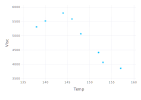

In [22]:
plot(data, x=:Temp, y=:Visc, Geom.point)

## b) Modèle quadratique

In [23]:
X = hcat(ones(n), x₁, x₁.^2)
p = size(X,2)-1

β̂ = X\y
println("β̂ = ", β̂)

e = y - X*β̂
SSE = e'e

R²aj = 1 - (n-1)/(n-p-1) * SSE/SST

println("R²aj = ", R²aj)


β̂ = [-148395.09326199448, 2182.9003730731733, -7.738653407443761]
R²aj = 0.862717327249004


## c) Modèle cubique

In [24]:
X = hcat(ones(n), x₁, x₁.^2, x₁.^3)
p = size(X,2)-1

β̂ = X\y
println("β̂ = ", β̂)

e = y - X*β̂
SSE = e'e

R²aj = 1 - (n-1)/(n-p) * SSE/SST

println("R²aj = ", R²aj)

β̂ = [-4.264403268480923e6, 86078.56109961054, -577.1390318846667, 1.2868077307584878]
R²aj = 0.9770957058873752


# Exercice 7

In [25]:
# Chargement des données

filename = joinpath(dirname(@__FILE__), "Data", "bodyfat.csv")

data = CSV.read(filename, DataFrame)

y = data.Bodyfat
x₁ = data.Triceps
x₂ = data.Thigh
x₃ = data.Midarm
n = length(y)


X = hcat(ones(n),x₁, x₂, x₃)
p = size(X,2) -1

first(data,5)

,Triceps,Thigh,Midarm,Bodyfat
,Float64,Float64,Float64,Float64
1,19.5,43.1,29.1,11.9
2,24.7,49.8,28.2,22.8
3,30.7,51.9,37.0,18.7
4,29.8,54.3,31.1,20.1
5,19.1,42.2,30.9,12.9


In [26]:
varsymbol = Symbol.(names(data)[1:3])

VIF = Float64[]

for v in varsymbol
   
    x = filter(e -> e ≠ v, varsymbol)
    model = lm(Term(v) ~ sum(Term.(x)), data)
    R² = r2(model)
    
    push!(VIF, 1/(1-R²))
    
end
VIF

3-element Vector{Float64}:
 708.842914172762
 564.3433857198089
 104.606005008185

# Exercice 8

In [27]:
# Chargement des données

filename = joinpath(dirname(@__FILE__), "Data", "bloodpressure.csv")

data = CSV.read(filename, DataFrame)

first(data,5)

,Pt,BP,Age,Weight,BSA,Dur,Pulse,Stress
,Int64,Int64,Int64,Float64,Float64,Float64,Int64,Int64
1,1,105,47,85.4,1.75,5.1,63,33
2,2,115,49,94.2,2.1,3.8,70,14
3,3,116,49,95.3,1.98,8.2,72,10
4,4,117,50,94.7,2.01,5.8,73,99
5,5,112,51,89.4,1.89,7.0,72,95


## a) Est-ce qu'il y a présence de multicolinéarité ?

In [28]:
varsymbol = Symbol.(names(data)[3:end])

VIF = Float64[]

for v in varsymbol
   
    x = filter(e -> e ≠ v, varsymbol)
    model = lm(Term(v) ~ sum(Term.(x)), data)
    R² = r2(model)
    
    push!(VIF, 1/(1-R²))
    
end

VIF


6-element Vector{Float64}:
 1.7628067217672174
 8.417035029633054
 5.32875147011891
 1.237309420519836
 4.413575165597285
 1.834845324264593

## b) En utilisant toutes les variables explicatives, vérifiez si les hypothèses de la régression sont satisfaites.

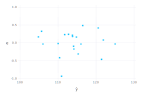

In [29]:
y = data.BP
n = length(y)

X = hcat(ones(n), data.Age, data.Weight, data.BSA, data.Dur, data.Pulse, data.Stress)

β̂ = X\y

ŷ = X*β̂

e = y - ŷ

fig = plot(x=ŷ, y=e, Geom.point, Coord.cartesian(ymin=-1, ymax=1), Guide.xlabel("ŷ"), Guide.ylabel("e"))

In [30]:
# draw(PDF("fig1_ex8.pdf"), fig)

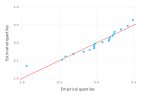

In [31]:
fig = henryplot(e)

In [32]:
# draw(PDF("fig2_ex8.pdf"), fig)

## c) Quel est le meilleur sous-ensemble des variables explicatives pour expliquer la tension artérielle des patients ?

In [33]:
varsymbols = Symbol.(names(data)[3:end])

6-element Vector{Symbol}:
 :Age
 :Weight
 :BSA
 :Dur
 :Pulse
 :Stress

In [34]:
R²_aj = Float64[]
varexp = Vector{Symbol}[]

Vector{Symbol}[]

In [35]:
for p in 1:6
    for v in combinations(varsymbols,p)
        model = lm(Term(:BP) ~ sum(Term.(v)), data)
        
        R² = r2(model)
        
        push!(R²_aj, 1 - (1-R²)*(n-1)/(n-p))
        push!(varexp, v)
    end
end

In [36]:
varexp

63-element Vector{Vector{Symbol}}:
 [:Age]
 [:Weight]
 [:BSA]
 [:Dur]
 [:Pulse]
 [:Stress]
 [:Age, :Weight]
 [:Age, :BSA]
 [:Age, :Dur]
 [:Age, :Pulse]
 [:Age, :Stress]
 [:Weight, :BSA]
 [:Weight, :Dur]
 ⋮
 [:Weight, :BSA, :Dur, :Pulse]
 [:Weight, :BSA, :Dur, :Stress]
 [:Weight, :BSA, :Pulse, :Stress]
 [:Weight, :Dur, :Pulse, :Stress]
 [:BSA, :Dur, :Pulse, :Stress]
 [:Age, :Weight, :BSA, :Dur, :Pulse]
 [:Age, :Weight, :BSA, :Dur, :Stress]
 [:Age, :Weight, :BSA, :Pulse, :Stress]
 [:Age, :Weight, :Dur, :Pulse, :Stress]
 [:Age, :BSA, :Dur, :Pulse, :Stress]
 [:Weight, :BSA, :Dur, :Pulse, :Stress]
 [:Age, :Weight, :BSA, :Dur, :Pulse, :Stress]

In [37]:
ind = sortperm(R²_aj)

63-element Vector{Int64}:
  6
 20
  4
 30
  9
 11
  1
 19
  5
 41
 29
 21
 10
  ⋮
 24
 45
 47
 60
 43
 22
 44
 58
 57
 42
 59
 63

In [38]:
varexp[ind]

63-element Vector{Vector{Symbol}}:
 [:Stress]
 [:Dur, :Stress]
 [:Dur]
 [:Age, :Dur, :Stress]
 [:Age, :Dur]
 [:Age, :Stress]
 [:Age]
 [:Dur, :Pulse]
 [:Pulse]
 [:Dur, :Pulse, :Stress]
 [:Age, :Dur, :Pulse]
 [:Pulse, :Stress]
 [:Age, :Pulse]
 ⋮
 [:Age, :Weight, :Pulse]
 [:Age, :Weight, :Dur, :Pulse]
 [:Age, :Weight, :Pulse, :Stress]
 [:Age, :Weight, :Dur, :Pulse, :Stress]
 [:Age, :Weight, :BSA, :Pulse]
 [:Age, :Weight, :BSA]
 [:Age, :Weight, :BSA, :Stress]
 [:Age, :Weight, :BSA, :Dur, :Stress]
 [:Age, :Weight, :BSA, :Dur, :Pulse]
 [:Age, :Weight, :BSA, :Dur]
 [:Age, :Weight, :BSA, :Pulse, :Stress]
 [:Age, :Weight, :BSA, :Dur, :Pulse, :Stress]

In [39]:
R²_aj[ind]

63-element Vector{Float64}:
 0.026863665100748335
 0.04112924837717358
 0.08575153489496723
 0.38505618602550373
 0.40823424685082466
 0.41056255745553727
 0.434403559403559
 0.4938072413655954
 0.5204369411520067
 0.526388941533654
 0.54715326645537
 0.5513448364559079
 0.5711823986555955
 ⋮
 0.9913614633345105
 0.9916616721532439
 0.9928030920394885
 0.9929811056234313
 0.993606508440566
 0.9939005564571042
 0.9939810592279594
 0.9941184457842843
 0.994123652945634
 0.9942299410261921
 0.9943761522069355
 0.9947753447710218